In [1]:
import pandas as pd
import numpy as np

In [2]:
clients = pd.read_csv("clients.csv")
clients = pd.DataFrame(clients)

In [3]:
qposts = pd.read_csv("questionposts_redacted.csv")
qposts = pd.DataFrame(qposts)
qposts.info()
# qposts = qposts.drop_duplicates(subset = ['QuestionUno'])

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356773 entries, 0 to 356772
Columns: 409 entries, Id to Unnamed: 408
dtypes: float64(1), object(408)
memory usage: 1.1+ GB


In [4]:
qposts = qposts[['Id','StateAbbr', 'QuestionUno', 'PostText', 'CreatedUtc']]

In [39]:
questions = pd.read_csv("questions.csv")
questions = pd.DataFrame(questions)

questions.head()

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [43]:
qnew = pd.merge(qposts, questions, on='QuestionUno', how = 'left')

qnew

,Id_x,StateAbbr_x,QuestionUno,PostText,CreatedUtc,Id_y,StateAbbr_y,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,AK,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,4/25/18 18:09,118516.0,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,Housing and Homelessness,6F28DF84-2BDA-48AE-97F8-A083D20E3EC8,Housing or Property Owned,56A7173F-C8B2-4E17-8189-DBDB8EDDAA1C,2018-04-04 23:15:49,0293D737-A73B-47D8-8D26-FE5AB33F67E1,2018-04-25 18:08:21,0293D737-A73B-47D8-8D26-FE5AB33F67E1,2018-05-05 18:09:47,NaN
1,2,AK,C579CE49-6B7A-44E7-A203-5D3E52623804,"Anyone?,",4/17/18 21:15,118517.0,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,Housing and Homelessness,6F28DF84-2BDA-48AE-97F8-A083D20E3EC8,Housing or Property Owned,6CB2B648-61A3-425F-9B84-A7C637B83126,2018-04-05 17:46:54,NaN,NaN,NaN,2018-05-07 17:12:17,NaN
2,3,AK,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,"Yes, those are the right forms. I'm sorry, I ...",4/18/18 17:51,118518.0,AK,A96DEADE-C287-4B31-BFF5-6C02E0640001,Family and Children,372E3CF8-3543-4C71-BA48-DA3F52FC5792,Family/Divorce/Custody,00BB08E8-38C6-42CE-8A01-6C8A1F7F88E7,2018-04-05 23:02:22,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-05 23:11:26,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-18 17:53:16,2018-04-18 00:00:00
3,4,AK,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,"Hi ###,You do make some good points. The diff...",4/18/18 22:15,118519.0,AK,E31B199A-B01E-47E6-86DB-8D99B2BB7420,Other,3DBF3B9F-9ED0-4028-A4FE-0823B0012634,Other,6CB2B648-61A3-425F-9B84-A7C637B83126,2018-04-07 22:49:08,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-09 18:34:20,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-28 22:15:35,NaN
4,5,AK,B4C814C9-8983-413F-8BC4-F2BE01665555,My father passed away and I have DNA test resu...,4/12/18 10:52,118520.0,AK,A96DEADE-C287-4B31-BFF5-6C02E0640001,Family and Children,BB9683D7-FAE6-4E33-AF74-52E71373C8D7,Wills/Inheritance,2761B481-9CAD-4494-B8CB-27AF221FDA69,2018-04-12 10:52:38,NaN,NaN,NaN,2018-05-22 22:31:34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356768,356955,UT,D1CD238C-4216-4F3D-BFB4-3C8D28C3B8C6,"Looking at your decree, and just generally as ...",4/25/19 16:29,180928.0,UT,39A338D3-FE08-4A0B-90FA-CEC4DBB2C64F,Family and Children,178DFF3C-856C-4100-B819-9659C3ECFC4E,Family/Divorce/Custody,2C9C84D9-4329-4FD7-9877-6491EFB2DE83,2019-04-22 23:41:33,85C0CADA-3E7F-4BE1-B852-DE1D58E7E02F,2019-04-24 16:53:40,85C0CADA-3E7F-4BE1-B852-DE1D58E7E02F,2019-05-10 13:55:30,NaN
356769,356956,UT,D1CD238C-4216-4F3D-BFB4-3C8D28C3B8C6,Thank you again for your time. Thus far no one...,4/30/19 13:56,180928.0,UT,39A338D3-FE08-4A0B-90FA-CEC4DBB2C64F,Family and Children,178DFF3C-856C-4100-B819-9659C3ECFC4E,Family/Divorce/Custody,2C9C84D9-4329-4FD7-9877-6491EFB2DE83,2019-04-22 23:41:33,85C0CADA-3E7F-4BE1-B852-DE1D58E7E02F,2019-04-24 16:53:40,85C0CADA-3E7F-4BE1-B852-DE1D58E7E02F,2019-05-10 13:55:30,NaN
356770,356957,UT,B9A70FE8-71CA-42F2-B7D4-8DE07E7DD41D,My neighbors behind me have ###. He recently c...,4/23/19 22:32,180929.0,UT,55739525-2665-43A6-9242-6A036EE81E55,Housing and Homelessness,796DFA43-55B0-48FA-8204-7B00135305DC,Housing or Property Owned,B75DF747-F207-499E-A2BA-AE95751D95B3,2019-04-23 22:31:37,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860,2019-05-09 23:02:12,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860,2019-05-23 15:13:52,NaN
356771,356958,UT,B9A70FE8-71CA-42F2-B7D4-8DE07E7DD41D,"Hi ###,Thank you for submitting your question....",5/9/19 23:11,180929.0,UT,55739525-2665-43A6-9242-6A036EE81E55,Housing and Homelessness,796DFA43-55B0-48FA-8204-7B00135305DC,Housing or Property Owned,B75DF747-F207-499E-A2BA-AE95751D95B3,2019-04-23 22:31:37,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860,2019-05-09 23:02:12,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860,2019-05-23 15:13:52,NaN


In [7]:
clientsnew = pd.merge(qnew, clients, left_on = 'AskedByClientUno', right_on = 'ClientUno', how = 'left')

In [8]:
attorneys = pd.read_csv('attorneys.csv')

In [9]:
master = pd.merge(clientsnew, attorneys, left_on = 'TakenByAttorneyUno', right_on = 'AttorneyUno', how = 'left')
master.info()

/var/folders/d5/szb9htrn1q99w81w44n65bm00000gn/T/ipykernel_24145/446031568.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'StateAbbr_x', 'Id_x'} in the result is deprecated and will raise a MergeError in a future version.
  master = pd.merge(clientsnew, attorneys, left_on = 'TakenByAttorneyUno', right_on = 'AttorneyUno', how = 'left')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 411003 entries, 0 to 411002
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_x                 411003 non-null  int64  
 1   StateAbbr_x          411003 non-null  object 
 2   QuestionUno          411003 non-null  object 
 3   CategoryUno          411003 non-null  object 
 4   Category             411003 non-null  object 
 5   SubcategoryUno       411003 non-null  object 
 6   Subcategory          411003 non-null  object 
 7   AskedByClientUno     410961 non-null  object 
 8   AskedOnUtc           411003 non-null  object 
 9   TakenByAttorneyUno   349665 non-null  object 
 10  TakenOnUtc           351394 non-null  object 
 11  ClosedByAttorneyUno  326972 non-null  object 
 12  ClosedOnUtc          406512 non-null  object 
 13  LegalDeadline        93957 non-null   object 
 14  Id_y                 356332 non-null  object 
 15  StateAbbr_y      

In [140]:
# # Save the DataTable to the desktop
# path = "~/Desktop/Datafest/data/"  # Update with the correct path to your desktop
# save_path = path + "master.csv"
# master.to_csv(save_path, index=False)

In [10]:
# check null values
master.isnull().sum()

Id_x                        0
StateAbbr_x                 0
QuestionUno                 0
CategoryUno                 0
Category                    0
SubcategoryUno              0
Subcategory                 0
AskedByClientUno           42
AskedOnUtc                  0
TakenByAttorneyUno      61338
TakenOnUtc              59609
ClosedByAttorneyUno     84031
ClosedOnUtc              4491
LegalDeadline          317046
Id_y                    54671
StateAbbr_y             54671
PostText                54673
CreatedUtc_x            54688
Id_x                       42
StateAbbr_x                42
ClientUno                  42
County_x                  254
StateName_x                42
PostalCode_x            16953
EthnicIdentity          51543
Age                     17003
Gender                  49265
MaritalStatus           50270
Veteran                 61924
Imprisoned              16117
NumberInHousehold       16117
AnnualIncome            16157
AllowedIncome           16117
CheckingBa

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

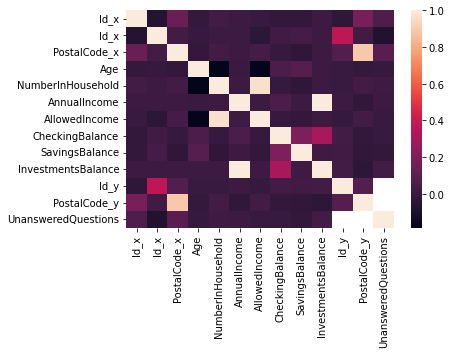

In [16]:
sns.heatmap(master.corr())

array([[<AxesSubplot:title={'center':'Id_x'}>,
        <AxesSubplot:title={'center':'Id_x'}>,
        <AxesSubplot:title={'center':'PostalCode_x'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'NumberInHousehold'}>,
        <AxesSubplot:title={'center':'AnnualIncome'}>],
       [<AxesSubplot:title={'center':'AllowedIncome'}>,
        <AxesSubplot:title={'center':'CheckingBalance'}>,
        <AxesSubplot:title={'center':'SavingsBalance'}>],
       [<AxesSubplot:title={'center':'InvestmentsBalance'}>,
        <AxesSubplot:title={'center':'Id_y'}>,
        <AxesSubplot:title={'center':'PostalCode_y'}>]], dtype=object)

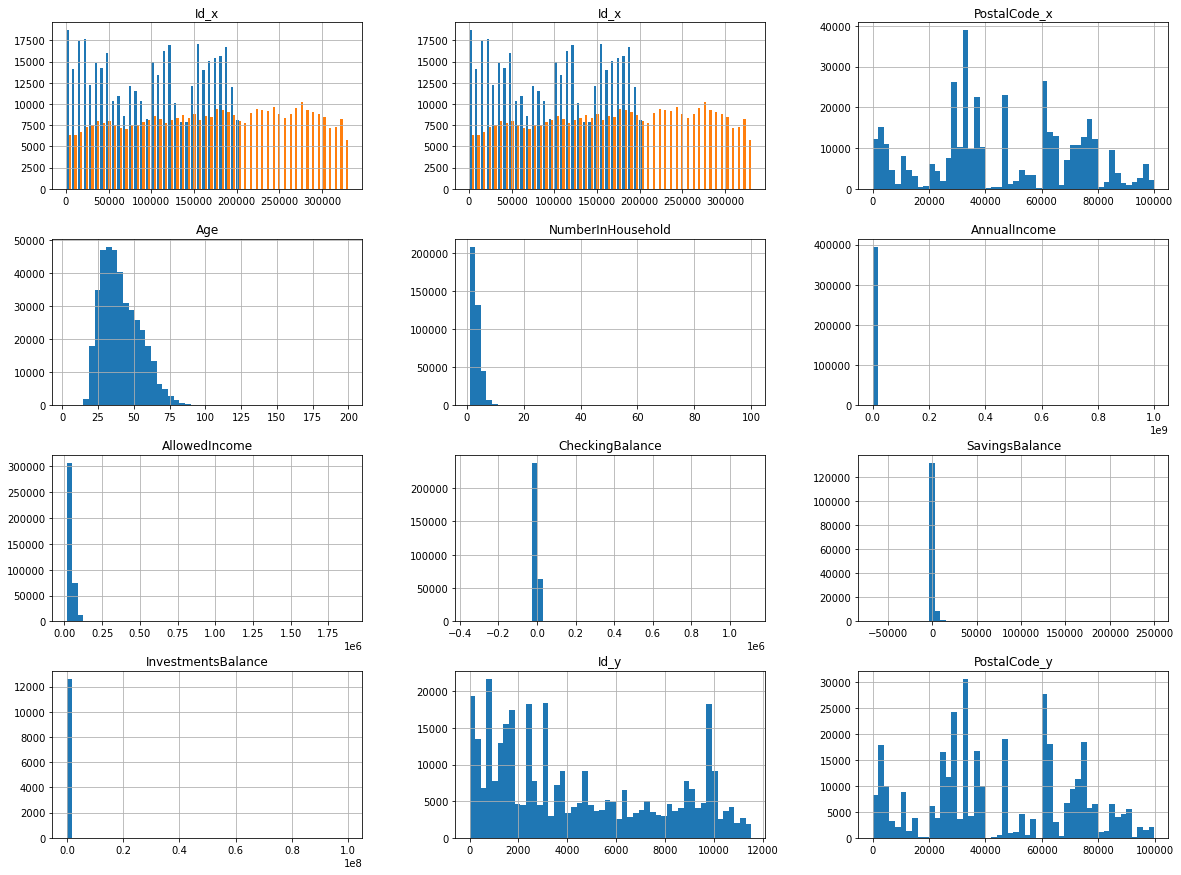

In [13]:
master.hist(bins=50, figsize=(20,15))

In [14]:
import plotly.express as px

In [34]:
master['UnansweredQuestions'] = master['TakenByAttorneyUno'].isnull()
master['UnansweredQuestions'] = master['UnansweredQuestions'].astype(int)

In [17]:
# questions['UnansweredQuestions'].hist()

In [36]:
master['AnsweredQuestions'] = master['TakenByAttorneyUno'].notnull()
master['AnsweredQuestions'] = master['AnsweredQuestions'].astype(int)

In [44]:
# master.head()

questions['UnansweredQuestions'] = questions['TakenByAttorneyUno'].isnull()
questions['UnansweredQuestions'] = questions['UnansweredQuestions'].astype(int)

questions['AnsweredQuestions'] = questions['TakenByAttorneyUno'].notnull()
questions['AnsweredQuestions'] = questions['AnsweredQuestions'].astype(int)

# Save the DataTable to the desktop
path = "~/Desktop/Datafest/data/"  # Update with the correct path to your desktop
save_path = path + "questions.csv"
questions.to_csv(save_path, index=False)

In [20]:
encoded_data = pd.get_dummies(master['Category'], prefix='Category')
encoded_data

,Category_Consumer Financial Questions,Category_Education,Category_Family and Children,Category_Health and Disability,Category_Housing and Homelessness,Category_Income Maintenance,Category_Individual Rights,Category_Juvenile,Category_Other,"Category_Work, Employment and Unemployment"
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
410998,0,0,0,0,0,0,0,0,1,0
410999,0,0,0,0,0,0,0,0,1,0
411000,0,0,0,0,0,0,0,0,1,0
411001,0,0,0,0,0,0,0,0,1,0


In [118]:
# encoded_data = questions['UnansweredQuestions'].astype(int)

In [21]:
import pandas as pd
import statsmodels.api as sm

X = sm.add_constant(encoded_data)
y = master['UnansweredQuestions'].copy()

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression model
print(result.summary())

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         Current function value: 0.418249
         Iterations: 35


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                            Logit Regression Results                           
Dep. Variable:     UnansweredQuestions   No. Observations:               411003
Model:                           Logit   Df Residuals:                   410992
Method:                            MLE   Df Model:                           10
Date:                 Sun, 30 Apr 2023   Pseudo R-squ.:                0.007449
Time:                         09:35:07   Log-Likelihood:            -1.7190e+05
converged:                       False   LL-Null:                   -1.7319e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.4124   4.76e+04  -2.97e-05      1.000   -9.33e+04    9.33e+04
Category_Consumer Financial

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is stored in a pandas DataFrame called 'data'
# Extract the relevant columns for analysis
df = master[['UnansweredQuestions', 'Category']]

# Create a contingency table
contingency_table = pd.crosstab(df['UnansweredQuestions'], df['Category'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 2616.0813848970215
p-value: 0.0
